In [1]:
# Credits: https://github.com/0rC0/MachineLearningForMedicalImages

In [2]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
#from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
import nibabel as nib
from nilearn import plotting as plotting
import glob

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [69]:
def binaryze_mask(in_file, out_file):
    from nipype.interfaces.fsl.maths import UnaryMaths
    binaryze_mask = UnaryMaths()
    binaryze_mask.inputs.in_file = in_file
    binaryze_mask.inputs.operation = 'bin'
    binaryze_mask.inputs.out_file = out_file
    #print(binaryze_mask.cmdline)
    binaryze_mask.run()
    return out_file

In [70]:
#os.getcwd()

In [71]:
data_folder = '../20190801'

## Extract data from preprocessed niftis and store them in concatenated numpy arrays

In [5]:
train_subjects = ['SMART008', 'SMART010']

In [6]:
flairs = glob.glob(data_folder + '/SMART0*/flair/SMART0*.flair_ro_n4_2t1Warped_brain.nii.gz')

In [7]:
t1s = glob.glob(data_folder + '/SMART0*/anat/SMART0*.anat_ro_n4_optiBET_brain.nii.gz')

In [73]:
les_bin = [data_folder + '/SMART005/flair/ples_lpa_mSMART005.flair_ro_n4_2t1Warped_bin.nii.gz',
      data_folder + '/SMART008/flair/ples_lpa_mSMART008.flair_ro_n4_2t1Warped_bin.nii.gz',
      data_folder + '/SMART010/flair/ples_lpa_mSMART010.flair_ro_n4_2t1Warped_bin.nii.gz']

In [75]:
#print(flairs)
#print(t1s)
#print(les)

In [76]:
 [os.path.isfile(i) for i in t1s ]

[True, True, True]

## Plotting

In [95]:
#plotting.plot_anat(wm_t1s[0], display_mode = 'z', black_bg = False)

In [96]:
#plotting.plot_anat(wm_flairs[0], display_mode = 'z', black_bg = False)

In [79]:
#plotting.plot_roi(les[0], wm_flairs[0], display_mode = 'z', cmap='Paired', black_bg = False)

# Open and Concatenate data

In [80]:
t1_values = np.concatenate(tuple([nib.load(i).get_data() for i in t1s]))
flair_values = np.concatenate(tuple([nib.load(i).get_data() for i in flairs]))
les_values = np.concatenate(tuple([nib.load(i).get_data() for i in les_bin]))


In [81]:
t1_values.shape == flair_values.shape == les_values.shape

True

In [82]:
np.argwhere(np.isnan(les_values))

array([], shape=(0, 3), dtype=int64)

## Mean Normalization

In [83]:
nt1= t1_values / np.mean(t1_values[np.nonzero(t1_values)])
nflair = flair_values / np.mean(flair_values[np.nonzero(flair_values)])

## Split Tissues from lesions

In [84]:
print(nflair.shape)
nflair.shape == nt1.shape

(576, 256, 256)


True

In [85]:
#flair_tissue = (nflair[np.nonzero((brain_mask == 1) & (wmh_mask == 0))])
flair_tissue = (nflair[np.nonzero((les_values == 0))])

In [86]:
#t1_tissue = (nt1[np.nonzero((brain_mask == 1) & (wmh_mask == 0))])
t1_tissue = (nt1[np.nonzero((les_values == 0))])


In [87]:
t1_tissue.shape

(37698791,)

In [88]:
flair_tissue.shape

(37698791,)

In [89]:
flair_les = (nflair[np.nonzero(les_values == 1)])
t1_les = (nt1[np.nonzero(les_values == 1)])

In [90]:
 t1_les.shape

(49945,)

In [91]:
np.sum(les_values)

49945.0

In [92]:
flair_les.shape == t1_les.shape

True

In [93]:
#train_df.to_csv('train_df.csv')

### Plot Intensitites

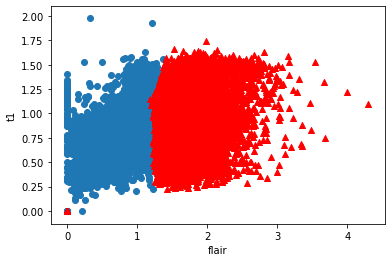

In [94]:
IND2=np.random.randint(np.shape(t1_tissue)[0], size=flair_les.shape[0])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(flair_tissue[IND2,], t1_tissue[IND2,])
ax.scatter(flair_les, t1_les, c='r', marker='^')
ax.set_xlabel('flair')
ax.set_ylabel('t1')
plt.show()